Q1

In [ ]:
pip install mlxtend

In [ ]:
pip install --upgrade mlxtend

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
file_path = 'retail.txt'
with open(file_path, 'r') as f:
    transactions = [line.strip().split() for line in f]

from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)
def find_frequent_patterns(min_support):
    frequent_itemsets = apriori(df, min_support=min_support, use_colnames=True)
    print(f"Frequent Itemsets with min_support = {min_support}:\n", frequent_itemsets)
    return frequent_itemsets
frequent_itemsets_1 = find_frequent_patterns(0.02)
frequent_itemsets_2 = find_frequent_patterns(0.05)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Frequent Itemsets with min_support = 0.02:
      support          itemsets
0   0.025374             (102)
1   0.031692             (111)
2   0.020258            (1328)
3   0.020179             (148)
4   0.035151             (171)
5   0.036943             (226)
6   0.034391             (238)
7   0.023752             (272)
8   0.029423             (311)
9   0.172036              (33)
10  0.033302              (37)
11  0.176902              (39)
12  0.574794              (40)
13  0.021324             (414)
14  0.169517              (42)
15  0.021132             (439)
16  0.024580             (476)
17  0.477927              (49)
18  0.050725              (66)
19  0.043522              (90)
20  0.030909         (111, 39)
21  0.034380         (171, 39)
22  0.023355         (171, 40)
23  0.026667         (40, 226)
24  0.021880         (238, 40)
25  0.021007         (311, 40)
26  0.032134          (33, 39)
27  0.095903          (33, 40)
28  0.036251          (33, 42)
29  0.091128          (49,

Q2

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules
frequent_itemsets = apriori(df, min_support=0.02, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5,num_itemsets=len(frequent_itemsets))
print("\nAssociation Rules:\n")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Association Rules:

     antecedents consequents   support  confidence      lift
0          (111)        (39)  0.030909    0.975304  5.513258
1          (171)        (39)  0.034380    0.978057  5.528821
2          (171)        (40)  0.023355    0.664408  1.155906
3          (226)        (40)  0.026667    0.721830  1.255806
4          (238)        (40)  0.021880    0.636214  1.106855
5          (311)        (40)  0.021007    0.713955  1.242106
6           (33)        (40)  0.095903    0.557460  0.969843
7           (33)        (49)  0.091128    0.529703  1.108334
8           (37)        (39)  0.031646    0.950272  5.371757
9           (37)        (40)  0.023105    0.693801  1.207043
10          (39)        (40)  0.117341    0.663311  1.153998
11          (39)        (49)  0.090107    0.509361  1.065772
12          (42)        (40)  0.129466    0.763734  1.328708
13          (49)        (40)  0.330551    0.691634  1.203273
14          (40)        (49)  0.330551    0.575076  1.203273
15 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


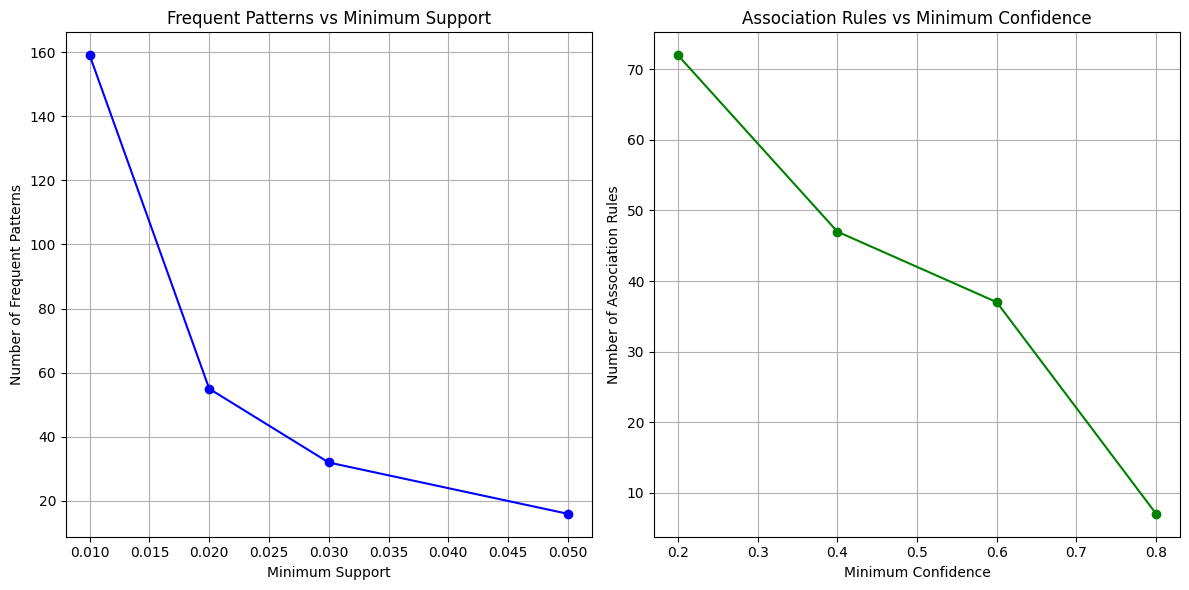

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
file_path = 'retail.txt'
with open(file_path, 'r') as f:
    transactions = [line.strip().split() for line in f]
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)
min_supports = [0.01, 0.02, 0.03, 0.05]
num_patterns = []

for support in min_supports:
    frequent_itemsets = apriori(df, min_support=support, use_colnames=True)
    num_patterns.append(len(frequent_itemsets))

frequent_itemsets = apriori(df, min_support=0.02, use_colnames=True)  # Fixed support
min_confidences = [0.2, 0.4, 0.6, 0.8]
num_rules = []

for confidence in min_confidences:
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=confidence,num_itemsets=len(frequent_itemsets))
    num_rules.append(len(rules))

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(min_supports, num_patterns, marker='o', color='b')
plt.title('Frequent Patterns vs Minimum Support')
plt.xlabel('Minimum Support')
plt.ylabel('Number of Frequent Patterns')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(min_confidences, num_rules, marker='o', color='g')
plt.title('Association Rules vs Minimum Confidence')
plt.xlabel('Minimum Confidence')
plt.ylabel('Number of Association Rules')
plt.grid(True)

plt.tight_layout()
plt.show()
